In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/inet_imageset.zip' -d "/content/inet_imageset"

In [ ]:
trainpath = '/content/inet_imageset/seg_train'
testpath = '/content/inet_imageset/seg_test'
valpath = '/content/inet_imageset/seg_pred'

In [ ]:
import os
import numpy as np
import cv2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=trainpath, target_size = (150,150), classes = os.listdir(trainpath), batch_size =16, shuffle = True)
testing_data = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=testpath, target_size = (150,150), classes = os.listdir(testpath), batch_size =16, shuffle = True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
training_data.class_indices

{'buildings': 5,
 'forest': 2,
 'glacier': 0,
 'mountain': 1,
 'sea': 3,
 'street': 4}

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_key(val):
  for key, value in training_data.class_indices.items():
    if val == value:
        return key

In [ ]:
training_data.__getitem__(0)[0].shape

(16, 150, 150, 3)

In [ ]:
one_batch_imgs = training_data.__getitem__(4)[0]
one_batch_labels = training_data.__getitem__(4)[1]

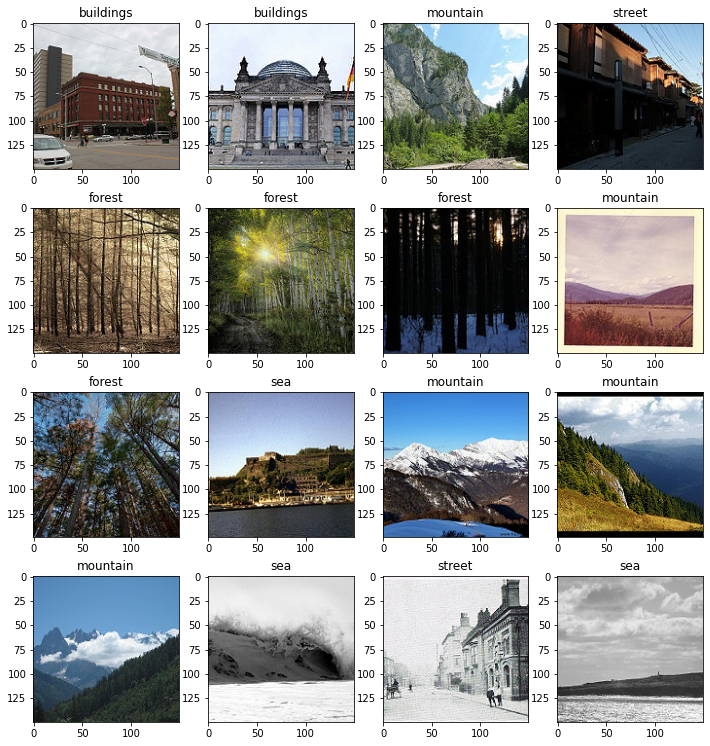

In [ ]:
fig = plt.figure(figsize = (12,13))
rows = 4
columns = 4 

for i in range(len(one_batch_imgs)):
  fig.add_subplot(rows,columns,i+1)
  plt.imshow(one_batch_imgs[i])
  l = get_key(one_batch_labels[i].argmax())
  plt.title(l)

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape = (150,150,3), kernel_size=(3,3), filters=16, activation="relu", padding="same"))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu", padding="same"))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu", padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu", padding="same"))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(Dropout(rate=0.7))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.3))

model.add(Dense(units=6,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0

In [ ]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
hist1 = model.fit(training_data,validation_data=testing_data,epochs=50,verbose = 1)

Epoch 1/50
878/878 [==============================] - 64s 34ms/step - loss: 2.8665 - accuracy: 3.3589e-05 - val_loss: 1.3321 - val_accuracy: 0.0000e+00
Epoch 2/50
878/878 [==============================] - 25s 28ms/step - loss: 1.3846 - accuracy: 1.0946e-04 - val_loss: 1.5774 - val_accuracy: 0.0000e+00
Epoch 3/50
878/878 [==============================] - 25s 28ms/step - loss: 1.2257 - accuracy: 3.1399e-04 - val_loss: 1.2596 - val_accuracy: 0.0000e+00
Epoch 4/50
878/878 [==============================] - 25s 28ms/step - loss: 1.0508 - accuracy: 0.0011 - val_loss: 1.2478 - val_accuracy: 0.0000e+00
Epoch 5/50
878/878 [==============================] - 25s 28ms/step - loss: 0.9939 - accuracy: 3.7659e-04 - val_loss: 0.9990 - val_accuracy: 0.0000e+00
Epoch 6/50
878/878 [==============================] - 25s 28ms/step - loss: 0.9047 - accuracy: 7.0244e-04 - val_loss: 0.8617 - val_accuracy: 0.0000e+00
Epoch 7/50
878/878 [==============================] - 25s 28ms/step - loss: 0.8950 - accurac

In [ ]:
model.evaluate(testing_data)

188/188 [==============================] - 4s 20ms/step - loss: 0.5292 - accuracy: 0.0400


[0.5291846394538879, 0.03999999910593033]

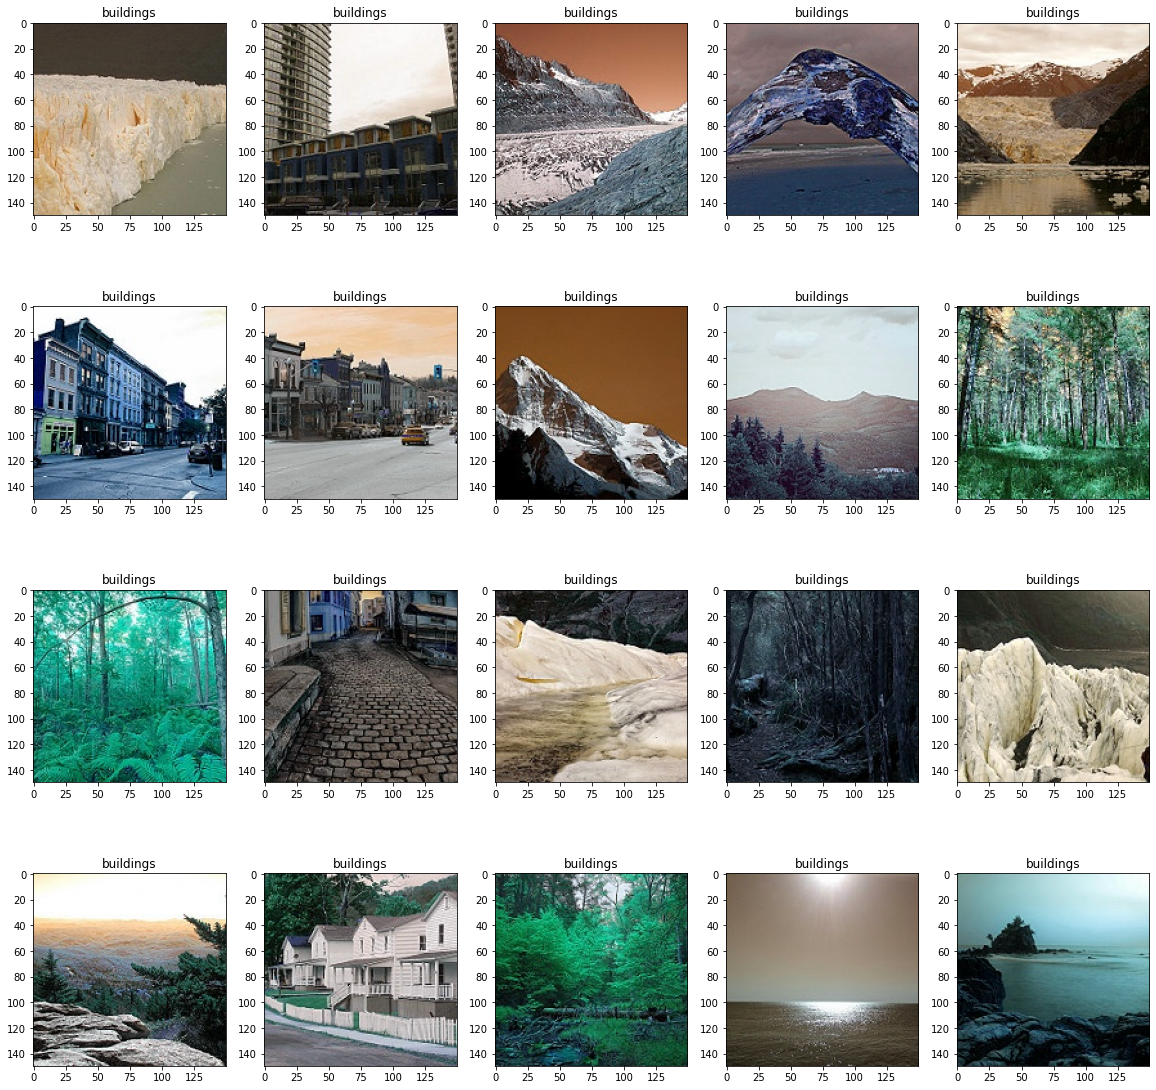

In [ ]:
fig = plt.figure(figsize = (20,20))
rows = 4
columns = 5 
iter = 1
for img in os.listdir(valpath)[:20]:
  i = cv2.imread(os.path.join(valpath,img))
  fig.add_subplot(rows,columns,iter)
  iter += 1
  plt.imshow(i)
  i = np.reshape(i,[1,150,150,3])
  l = get_key(model.predict(i).argmax())
  plt.title(l)

plt.show()

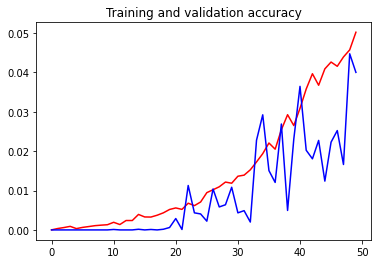

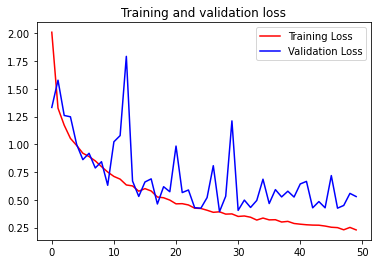

In [ ]:
acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models, layers

In [ ]:
import tensorflow as tf

In [ ]:
vgg_model = VGG16(include_top=False, weights="imagenet",input_shape=(150,150,3))

for layer in vgg_model.layers:
  layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(vgg_model)

model.add(layers.Flatten())

model.add(layers.Dropout(0.25))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 6150      
Total params: 23,110,470
Trainable params: 8,395,782
Non-trainable params: 14,714,688
__________________________________

In [ ]:
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist2 = model.fit(training_data,validation_data=testing_data,epochs=30,verbose=1)

Epoch 1/30
878/878 [==============================] - 44s 47ms/step - loss: 1.2703 - accuracy: 0.6987 - val_loss: 0.4641 - val_accuracy: 0.8370
Epoch 2/30
878/878 [==============================] - 40s 45ms/step - loss: 0.5552 - accuracy: 0.8310 - val_loss: 0.5901 - val_accuracy: 0.8340
Epoch 3/30
878/878 [==============================] - 40s 46ms/step - loss: 0.5233 - accuracy: 0.8423 - val_loss: 0.4267 - val_accuracy: 0.8697
Epoch 4/30
878/878 [==============================] - 40s 46ms/step - loss: 0.4887 - accuracy: 0.8593 - val_loss: 0.4571 - val_accuracy: 0.8713
Epoch 5/30
878/878 [==============================] - 41s 46ms/step - loss: 0.4703 - accuracy: 0.8632 - val_loss: 0.4134 - val_accuracy: 0.8790
Epoch 6/30
878/878 [==============================] - 41s 46ms/step - loss: 0.4497 - accuracy: 0.8744 - val_loss: 0.4758 - val_accuracy: 0.8750
Epoch 7/30
878/878 [==============================] - 41s 47ms/step - loss: 0.4429 - accuracy: 0.8752 - val_loss: 0.4713 - val_accuracy:

In [ ]:
model.evaluate(testing_data)

188/188 [==============================] - 7s 35ms/step - loss: 1.0258 - accuracy: 0.8767


[1.0258052349090576, 0.8766666650772095]

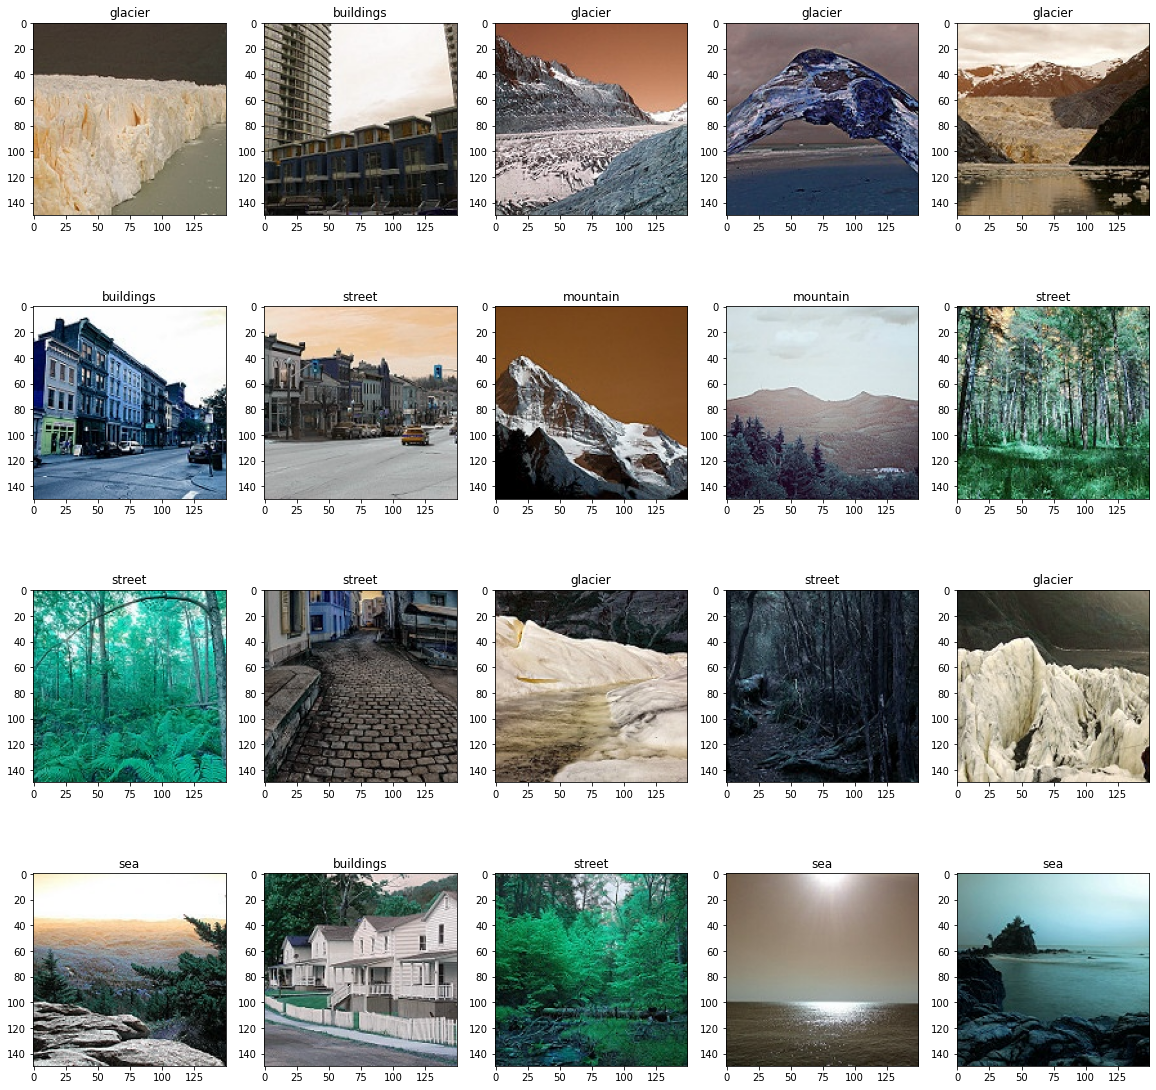

In [ ]:
fig = plt.figure(figsize = (20,20))
rows = 4
columns = 5 
iter = 1
for img in os.listdir(valpath)[:20]:
  i = cv2.imread(os.path.join(valpath,img))
  fig.add_subplot(rows,columns,iter)
  iter += 1
  plt.imshow(i)
  i = np.reshape(i,[1,150,150,3])
  l = get_key(model.predict(i).argmax())
  plt.title(l)

plt.show()

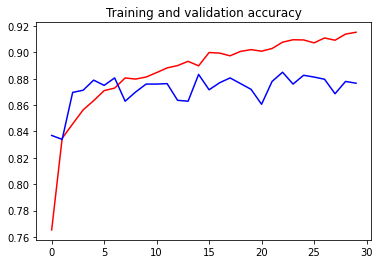

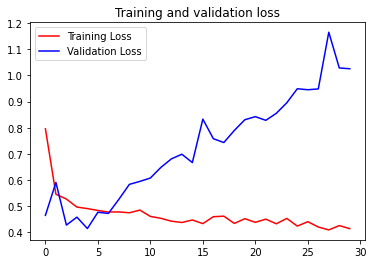

In [ ]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()